<a href="https://colab.research.google.com/github/Nikhil07-source/Exploratory-Data-Analysis_EDA/blob/main/Walmart_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Retail Analysis with Walmart Data - Project

##Problem Statement
###Basic Statistics tasks
1. Which store has maximum sales?
2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?
3. Which store/s has good quarterly growth rate in Q3’2012?
4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.
5. Provide a monthly and semester view of sales in units and give insights

###Statistical Model
For Store 1 – Build  prediction models to forecast demand
- Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
- Change dates into days by creating new variable.

##Data Loading and Description
![image.png](https://raw.githubusercontent.com/Masterx-AI/Project_Retail_Analysis_with_Walmart/main/Wallmart1.jpg)

###Description
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

###Dataset Description

Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- Store - the store number
- Date - the week of sales
- Weekly_Sales -  sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – - Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

###Holiday Events
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Importing packages                                          

In [2]:
#Getting Pandas Profiling Report
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     - 17.9 MB 32.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390938 sha256=a6229b9ffa1c43a72d5ffb31c4249bdae6ce5c2854f8fff3bba2fb72b6e6915d
  Stored in directory: /tmp/pip-ephem-wheel-cache-k0k65qq3/wheels/f5/4e/04/09011c49d76834ce963a4fe57acc90b11fa8bb282bb9781d97
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f7a4d8a8cf654322db506344108369e66b345ff072bac5727bba1376267e05a8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

In [3]:
#Importing Libraries
!pip install ydata-profiling
from ydata_profiling import ProfileReport  #importing pandas preprofiling

import numpy as np                         #importing numpy library
import pandas as pd                        #importing pandas library
import matplotlib.pyplot as plt            #importing matplotlib library
import seaborn as sns                      #importing seaborn library
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Nikhil07-source/Exploratory-Data-Analysis_EDA/refs/heads/main/Walmart_Store_sales.csv")  #Getting dataset from Github Raw url.
df #getting dataset, we shall use print() for getting output, but this tabular structure of dataset looks good.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
type(df)            #Getting the type of the Dataset.

pandas.core.frame.DataFrame

In [6]:
df.info()         #Getting the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Observation:
- There are total 6435 entries, starting form index 0-6434.
- There are total 8 columns.
- Columns names are -  Store, Date, Weekly_sales, Holiday_Flag, Temprature, Fuel_price, CPI, Unemployment.
- There are no null values in any columns.
- Datatype of the columns are - int64, object, float64.
- Memory usage: : 402.3+ KB

###Data Profiling


####Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [7]:
df.shape      #getting the shape of the dataframe=df, which shows (6435* 8) which means 6435 rows, 8 columns.

(6435, 8)

In [8]:
df.columns    #getting all columns.

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
df.head(10)   #getting all data from top 10 rows including index 0.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [10]:
df.tail(10)   #getting all data from last 10 rows.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [11]:
df.isnull()     #checking null values in each rows & columns using isnull() function, True = null values, False = no null values.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


There are no null values, we are good to go ahead.

###Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot.
- _Grannular level_ analysis of each column.

In [12]:
profile = ProfileReport(df, title="Walmart Dataset Profile")
profile.to_file(output_file="walmart_before_processing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- __ProfileReport__: This is the main function from the pandas_profiling library that generates the report.
- __df__: This is the DataFrame containing the Titanic dataset that we want to analyze.
- __title__: This parameter allows us to set a custom title for the report, which in this case is "Titanic Dataset Profile".
- __profile__: This is an instance of the ProfileReport class created from a pandas DataFrame.
- __to_file()__: This method is used to write the profiling report to a specified output file.
- __output_file__: This parameter specifies the name of the file where the report will be saved.</br></br>

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __titanic_before_preprocessing.html__.</br>Take a look at the file and see what useful insight you can develop from it.
Now we will process our data to better understand it.

###Form Pandas Pre Profiling we came to know that:
####Dataset statistics
- Number of variables:	8
- Number of observations:	6435
- Missing cells:	0
- Duplicate rows: 	0
- Total size in memory: 	402.3 KiB

####Variable types
- Numeric:	6
- DateTime:	1
- Categorical:	1


####Alerts
- Holiday_Flag is highly imbalanced (63.4%)
- Weekly_Sales has unique values

###Below is the iframe code for pandas Pre Profiling for better understanding.

In [13]:
profile.to_notebook_iframe()

In [14]:
#Breaking Date column in Year, Month & Day column for better understanding.
df['Year'] = pd.DatetimeIndex(df['Date']).year      #Extracting Year from 'Date' Column and storing it into new column name 'Year'.
df['Month'] = pd.DatetimeIndex(df['Date']).month    #Extracting Month from 'Date' Column and storing it into new column name 'Month'.
df['Day'] = pd.DatetimeIndex(df['Date']).day        #Extracting Day from 'Date' Column and storing it into new column name 'Day'.

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


- Creating a new column named __'Weekly_Sales_bin'__.

In [15]:
# Looping through values from 6435 down to 1 (in steps of -1)
for i in range(6435, 0, -1):
    # Assigning the value of 'i' to the 'Weekly_Sales_Bin' column
    # where 'Weekly_Sales' is less than or equal to i million
    df.loc[df['Weekly_Sales'] <= i * 1000000, 'Weekly_Sales_Bin'] = i

# Displaying the 'Weekly_Sales' and 'Weekly_Sales_Bin' columns
df[['Weekly_Sales', 'Weekly_Sales_Bin']]


,Weekly_Sales,Weekly_Sales_Bin
0,1643690.90,2.0
1,1641957.44,2.0
2,1611968.17,2.0
3,1409727.59,2.0
4,1554806.68,2.0
...,...,...
6430,713173.95,1.0
6431,733455.07,1.0
6432,734464.36,1.0
6433,718125.53,1.0


In [16]:
# Grouping the data by 'Store' and 'Weekly_Sales_Bin', then summing up 'Weekly_Sales' within each group
# Sorting the summed values of 'Weekly_Sales' in descending order
df.groupby(['Store', 'Weekly_Sales_Bin'])['Weekly_Sales'].sum().sort_values(ascending=False)

,,Weekly_Sales
Store,Weekly_Sales_Bin,
27,2.0,2.177748e+08
2,2.0,2.163499e+08
1,2.0,2.157113e+08
10,2.0,2.144006e+08
6,2.0,2.097417e+08
...,...,...
18,3.0,2.027507e+06
28,3.0,2.026026e+06
16,2.0,1.004731e+06


####Q1. Getting the Store which has maximum sales

In [17]:
# Printing a message to indicate the following output
print('Here is the top 5 list of the Store with highest sales:')

# Grouping the data by 'Store', summing up the 'Weekly_Sales' for each store,
# sorting the stores by total sales in descending order, and selecting the top 5 stores
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head()


Here is the top 5 list of the Store with highest sales:


,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08


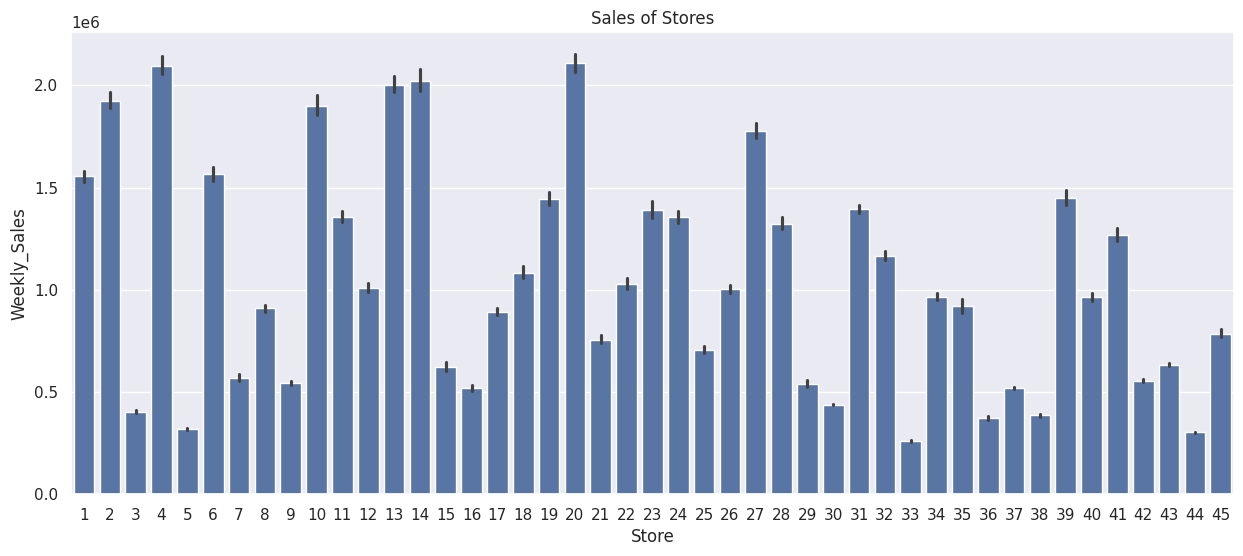

In [18]:
# Creating a figure with a specified size (15 inches by 6 inches)
plt.figure(figsize=(15,6))

# Creating a bar plot to visualize the sales of stores
# 'x' represents the 'Store' column, and 'y' represents the 'Weekly_Sales' column
sns.barplot(x = df['Store'], y = df['Weekly_Sales'], data = df)

# Setting the title of the plot
plt.title('Sales of Stores')

# Displaying the plot
plt.show()

####Q2. i. Getting stores which has maximum standard deviation.

In [19]:
df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False).head()

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742
4,266201.442297
13,265506.995776


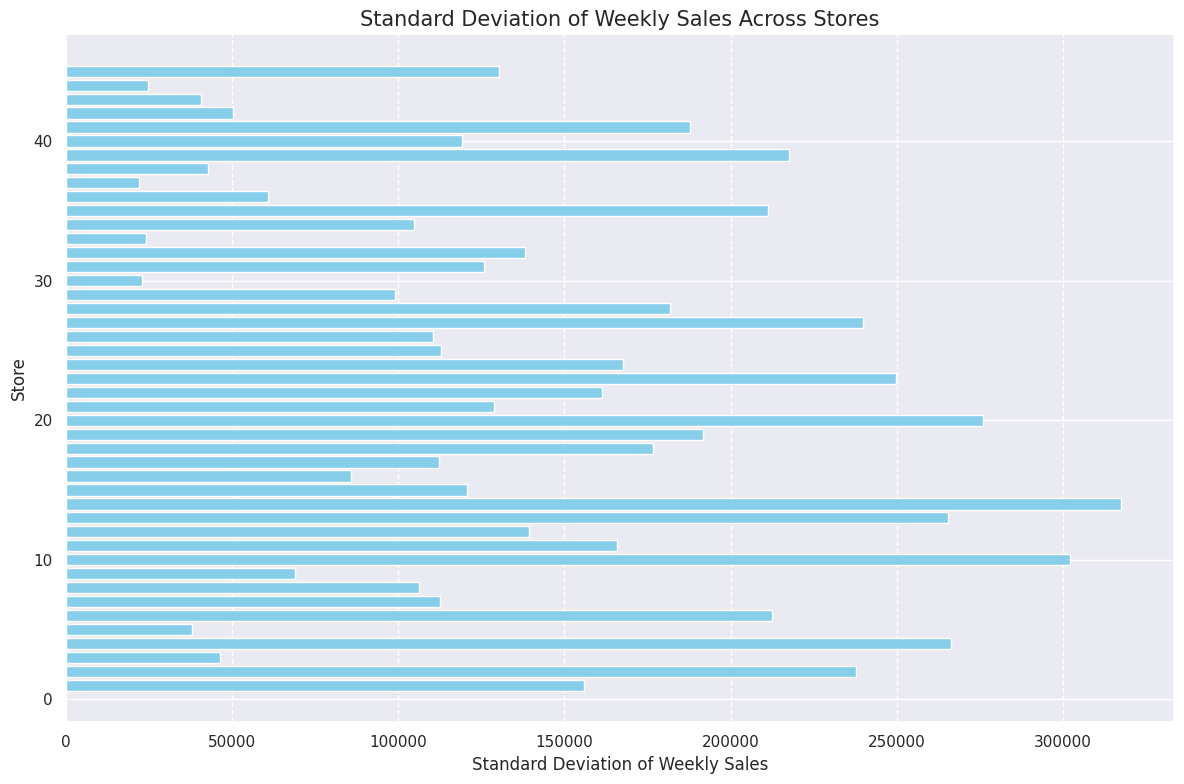

In [20]:
#Calculate the standard deviation of 'Weekly_Sales' for each store
store_std = df.groupby('Store')['Weekly_Sales'].std()

# Plot a horizontal bar chart for standard deviation of Weekly Sales by Store
plt.figure(figsize=(12, 8))
plt.barh(store_std.index, store_std.values, color='skyblue')

# Add labels and title
plt.xlabel('Standard Deviation of Weekly Sales', fontsize=12)
plt.ylabel('Store', fontsize=12)
plt.title('Standard Deviation of Weekly Sales Across Stores', fontsize=15)

# Show the plot
plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()


####Q2. ii. Finding out the coefficient of mean to standard deviation.

In [21]:
# Group by 'Store' and calculate mean and standard deviation of 'Weekly_Sales'
mean = df.groupby('Store')['Weekly_Sales'].mean()
std = df.groupby('Store')['Weekly_Sales'].std()

# Calculate the coefficient of variation (std / mean)
coefficient_value = mean / std

# Getting Coefficient value arranged in decending order so we can get data from highest to lowest.
coefficient_value.sort_values(ascending=False)

,Weekly_Sales
Store,
37,23.761933
30,19.227797
43,15.599741
44,12.225939
31,11.091264
42,11.069866
33,10.767931
1,9.970873
34,9.239989


In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(coefficient_value.index, coefficient_value.values, color='skyblue')

# Add labels and title
plt.xlabel('Store')
plt.ylabel('Coefficient of Mean to Standard Deviation')
plt.title('Coefficient of Mean to Standard Deviation by Store')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
df.head()

####Q3. Which store/s has good quarterly growth rate in Q3’2012?


In [ ]:
df.head()

In [ ]:
# Filtering data for Q3 (July, August, September) of the year 2012
filter_year_month_q3 = df[(df.Year == 2012) & ((df.Month >= 7) & (df.Month <= 9))]

# Filtering data for Q2 (April, May, June) of the year 2012
filter_year_month_q2 = df[(df.Year == 2012) & ((df.Month >= 4) & (df.Month <= 6))]

# Grouping the Q3 data by 'Store' and summing the 'Weekly_Sales' for each store
q3_sales = filter_year_month_q3.groupby('Store').sum()['Weekly_Sales']

# Grouping the Q2 data by 'Store' and summing the 'Weekly_Sales' for each store
q2_sales = filter_year_month_q2.groupby('Store').sum()['Weekly_Sales']

# Calculating the growth rate between Q3 and Q2 for each store
# The growth rate is calculated as: ((Q3 sales - Q2 sales) / Q2 sales) * 100
growth_rate = ((q3_sales - q2_sales) / q2_sales) * 100

# Sorting the growth rate in descending order (highest growth first)
sorted_growth_rate = growth_rate.sort_values(ascending=False)

# Printing a message and displaying the top 5 stores with the highest growth rate in Q3 2012
print('Below are top 5 Stores with good quarterly growth rate in Q3 2012\n')
sorted_growth_rate.head()

In [ ]:
# Create a line plot with growth_rate on x-axis and stores on y-axis
plt.figure(figsize=(10, 6))
plt.plot(growth_rate.values, growth_rate.index, marker='o', color='green')

# Add labels and title
plt.xlabel('Growth Rate (%)')
plt.ylabel('Store')
plt.title('Quarterly Growth Rate for Q3 2012 by Store')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
bubble_data = pd.DataFrame({
    'Store': sorted_growth_rate.index,
    'Growth Rate': sorted_growth_rate.values,
    'Sales': q3_sales.values  # Optional: Use 'q3_sales' as bubble size
})

# Plot the bubble plot
plt.figure(figsize=(12, 8))

# Scatter plot with 'Store' on x-axis, 'Growth Rate' on y-axis, and bubble size controlled by 'Sales'
plt.scatter(bubble_data['Growth Rate'], bubble_data['Store'],
            s=bubble_data['Sales'] / 10000,  # Size of bubbles, scale appropriately
            c=bubble_data['Growth Rate'],  # Color by growth rate
            cmap='coolwarm',  # Color map
            alpha=0.7,  # Transparency
            edgecolors="w",  # White edge around the bubbles
            linewidth=1)

# Add labels and title
plt.xlabel('Growth Rate (%)')
plt.ylabel('Store')
plt.title('Bubble Plot of Growth Rates for Q3 2012 by Store')

# Add color bar for growth rate
plt.colorbar(label='Growth Rate')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot with 'Growth Rate' on the y-axis and 'Store' on the x-axis
plt.scatter(growth_rate.values, growth_rate.index, color='skyblue', edgecolors='black')

# Add labels and title
plt.xlabel('Store')
plt.ylabel('Growth Rate (%)')
plt.title('Scatter Plot of Growth Rates for Q3 2012 by Store')

# Rotate x-axis labels for better readability if there are many stores
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

####Q4.  Finding out holidays which have higher sales than the mean sales in non-holiday season for all stores together


In [ ]:
# Calculate the mean sales for non-holiday weeks
non_holiday_mean = df[df.Holiday_Flag == 0]['Weekly_Sales'].mean()

# Filter rows where Holiday_Flag is 1 (holiday weeks) and weekly sales are greater than non-holiday mean
filtered_holidays = df[(df.Holiday_Flag == 1) & (non_holiday_mean < df.Weekly_Sales)]

# Display the filtered rows
filtered_holidays


In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(filtered_holidays['Date'], filtered_holidays['Weekly_Sales'], color='skyblue', label='Holiday Sales')

# Plot non-holiday mean line
plt.axhline(y=non_holiday_mean, color='r', linestyle='--', label=f'Non-Holiday Mean: {non_holiday_mean:.2f}')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Holiday Sales Higher than Non-Holiday Mean')
plt.xticks(rotation=90)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(12, 6))  # Increase the width (14) and set the height (6)

# Create scatter plot for sales with color indicating holiday vs non-holiday
sns.scatterplot(x='Date', y='Weekly_Sales', data=df, hue='Holiday_Flag', palette={0: 'blue', 1: 'orange'})

# Add a horizontal line for non-holiday mean
plt.axhline(y=non_holiday_mean, color='r', linestyle='--', label=f'Non-Holiday Mean: {non_holiday_mean:.2f}')

# Add labels and title
plt.ylabel('Weekly Sales')
plt.title('Comparison of Holiday and Non-Holiday Weekly Sales')

# Hide x-axis ticks (but keep the axis)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


####Q5. Providing a monthly and semester view of sales in units and give insights

In [ ]:
# Group by Year and Month to calculate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Rename the column for clarity
monthly_sales.rename(columns={'Weekly_Sales': 'Monthly_Sales'}, inplace=True)

monthly_sales.head()

In [ ]:
# Add a 'Semester' column
df['Semester'] = df['Month'].apply(lambda x: 'H1' if x <= 6 else 'H2')

# Group by Year and Semester to calculate total sales
semester_sales = df.groupby(['Year', 'Semester'])['Weekly_Sales'].sum().reset_index()

# Rename the column for clarity
semester_sales.rename(columns={'Weekly_Sales': 'Semester_Sales'}, inplace=True)

df.head()

In [ ]:
# Monthly Sales Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales['Month'], y=monthly_sales['Monthly_Sales'], hue=monthly_sales['Year'], palette='viridis')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Across Years')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [ ]:
# Semester Sales Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=semester_sales['Semester'], y=semester_sales['Semester_Sales'], hue=semester_sales['Year'], palette='coolwarm')

# Add labels and title
plt.xlabel('Semester')
plt.ylabel('Semester Sales')
plt.title('Semester Sales Across Years')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

###Statistical Model
For Store 1 – Build prediction models to forecast demand
- Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the
earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

- Change dates into days by creating ne

Select the model which gives best accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the features (X) and target variable (Y)
X = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
Y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred))

# Calculate Root Mean Squared Error (RMSE) manually
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# R-squared value
print("R-squared:", metrics.r2_score(Y_test, Y_pred))

# Scatter plot of predicted vs actual values
sns.scatterplot(x=Y_pred, y=Y_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

print('Random Forest Regressor:')
print()

# Initialize the Random Forest Regressor model
rfr = RandomForestRegressor()

# Train the model
rfr.fit(X_train, Y_train)

# Make predictions
Y_pred = rfr.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", rfr.score(X_test, Y_test) * 100)
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, Y_pred))

# Calculate and print Root Mean Squared Error (RMSE) manually
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)

# Scatter plot of predicted vs actual values
sns.scatterplot(x=Y_pred, y=Y_test)


In [ ]:
# Calculate the correlation matrix
corr_matrix = df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year', 'Weekly_Sales']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Show the plot
plt.title("Correlation between Weekly Sales and Independent Variables")
plt.show()

#Hypothesis Testing
- Fuel Price shows no relationship to weekly sales.
- CPI shows some positive relationships to weekly sales.
- Unemployment shows no relationship to weekly sales.
